# Text Data - Preprocessing and Text to Numerical Vector

# Text Preprocessing 

1.Tokenisation

2.Removing special characters

3.Convert sentence into lower case

4.Removing stop words

5.Stemming or Lemmatization

# Techniques to convert Text to Numerical Vectors

1.Bag of Words

2.TF IDF (Term Frequency - Inverse Document Frequency)

3.Word2Vec (by Google)

4.GloVe (Global Vectors by Stanford) - Not Covered in this notebook

5.Pretrained GloVe Embeddings

6.FastText (by Facebook) - Not Covered in this notebook

7.ELMo (Embeddings from Language Models) - Not Covered in this notebook

8.BERT (Bidirectional Encoder Representations from Transformer)

# Data Preparation

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
lst_text = ['it Was the best oF Times $', 
            'It was The worst of times.',
            'IT 9 was tHe age Of wisdom', 
            'it was thE age of foolishness']

df = pd.DataFrame({'text': lst_text})

df.head()

,text
0,it Was the best oF Times $
1,It was The worst of times.
2,IT 9 was tHe age Of wisdom
3,it was thE age of foolishness


In [11]:
!pip install nltk

In [12]:
import nltk
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SNEGHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SNEGHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SNEGHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [14]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [15]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

# Text Preprocessing Steps

Text Preprocessing steps include some essential tasks to clean and remove the noise from the available data.

1.Removing Special Characters and Punctuation

2.Converting to Lower Case - We convert the whole text corpus to lower case to reduce the size of the vocabulary of our text data.

3.Removing Stop Words - Stopwords don't contribute to the meaning of a sentence. So, we can safely remove them without changing the meaning of the sentence. For eg: it, was, any, then, a, is, by, etc are the stopwords.

4.Stemming or Lemmatization - Stemming is the process of getting the root form of a word. For eg: warm, warmer, warming can be converted to warm.

In [16]:
raw_text = "This 1is Natural-LAnguage-Processing."
print(raw_text)

This 1is Natural-LAnguage-Processing.


In [17]:
# Removing special characters and digits
sentence = re.sub("[^a-zA-Z]", " ", raw_text)
print(sentence)

This  is Natural LAnguage Processing 


In [18]:
# change sentence to lower case
sentence = sentence.lower()
print(sentence)

this  is natural language processing 


In [19]:
# tokenize into words
tokens = sentence.split()
print(tokens)

['this', 'is', 'natural', 'language', 'processing']


In [20]:
# Removing stop words
clean_tokens = [t for t in tokens if t not in stopwords.words("english")]
print(clean_tokens)

['natural', 'language', 'processing']


In [21]:
# Stemming
clean_tokens_stem = [stemmer.stem(word) for word in clean_tokens]
print(clean_tokens_stem)

['natur', 'languag', 'process']


In [22]:
# Lemmatizing
clean_tokens_lem = [lemmatizer.lemmatize(word) for word in clean_tokens]
print(clean_tokens_lem)

['natural', 'language', 'processing']


In [23]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if t not in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [24]:
temp_df = df['text'].apply(lambda x : preprocess(x, 'stem'))

temp_df.head()

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [25]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']

temp_df.head()

,clean_text_stem,text_length_stem
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [26]:
df = pd.concat([df, temp_df], axis=1)

df.head()

,text,clean_text_stem,text_length_stem
0,it Was the best oF Times $,best time,2
1,It was The worst of times.,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2
3,it was thE age of foolishness,age foolish,2


In [27]:
temp_df = df['text'].apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolishness,2


In [28]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolishness,2


In [29]:
df = pd.concat([df, temp_df], axis=1)

df.head()


,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
0,it Was the best oF Times $,best time,2,best time,2
1,It was The worst of times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE age of foolishness,age foolish,2,age foolishness,2


# Bag of Word 

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [30]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
0,it Was the best oF Times $,best time,2,best time,2
1,It was The worst of times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE age of foolishness,age foolish,2,age foolishness,2


In [31]:
# Bag of Words

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vocab = CountVectorizer()

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

dtm = vocab.fit_transform(df['clean_text_lemma'])

# fit_transform() could be done seperatly as mentioned below
# vocab.fit(df.clean_text_stem)
# dtm = vocab.transform(df.clean_text_stem)

In [32]:
# We can look at unique words by using 'vocabulary_'

vocab.vocabulary_

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}

In [33]:
# Observe that the type of dtm is sparse

print(type(dtm))

<class 'scipy.sparse._csr.csr_matrix'>


In [34]:
# Lets now print the  shape of this dtm

print(dtm.shape)

# o/p -> (4, 6)
# i.e -> 4 documents and 6 unique words

(4, 6)


In [35]:
# Lets look at the dtm

print(dtm)

# Remember that dtm is a sparse matrix. i.e. zeros wont be stored
# Lets understand First line of output -> (0,1)    1
# Here (0, 1) means 0th document and 1st(index starting from 0) unique word. 
# (we have total 4 documents) & (we have total 6 unique words)
# (0, 1)    1 -> 1 here refers to the number of occurence of 1st word
# Now lets read it all in english.
# (0, 1)    1 -> 'times' occurs 1 time in 0th document. 
# Try to observe -> (3, 2)   1

  (0, 1)	1
  (0, 3)	1
  (1, 3)	1
  (1, 5)	1
  (2, 0)	1
  (2, 4)	1
  (3, 0)	1
  (3, 2)	1


In [36]:
# Since the dtm is sparse, lets convert it into numpy array.

print(dtm.toarray())

[[0 1 0 1 0 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]
 [1 0 1 0 0 0]]


In [37]:
sorted(vocab.vocabulary_)

['age', 'best', 'foolishness', 'time', 'wisdom', 'worst']

In [38]:
pd.DataFrame(dtm.toarray(), columns=sorted(vocab.vocabulary_))

,age,best,foolishness,time,wisdom,worst
0,0,1,0,1,0,0
1,0,0,0,1,0,1
2,1,0,0,0,1,0
3,1,0,1,0,0,0


In [39]:
# 2-grams

vocab = CountVectorizer(ngram_range=[1,2])

dtm = vocab.fit_transform(df.clean_text_stem)

In [40]:
print(vocab.vocabulary_)

{'best': 3, 'time': 6, 'best time': 4, 'worst': 8, 'worst time': 9, 'age': 0, 'wisdom': 7, 'age wisdom': 2, 'foolish': 5, 'age foolish': 1}


In [41]:
# convert sparse matrix to numpy array
print(dtm.toarray())

[[0 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 1 1]
 [1 0 1 0 0 0 0 1 0 0]
 [1 1 0 0 0 1 0 0 0 0]]


In [42]:
pd.DataFrame(dtm.toarray(), columns=sorted(vocab.vocabulary_))

,age,age foolish,age wisdom,best,best time,foolish,time,wisdom,worst,worst time
0,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,1,1
2,1,0,1,0,0,0,0,1,0,0
3,1,1,0,0,0,1,0,0,0,0


# Term Frequency Inverse Document Frequency

In BOW approach all the words in the text are treated as equally important i.e. there's no notion of some words in the document being more important than others. TF-IDF, or term frequency-inverse document frequency, addresses this issue. It aims to quantify the importance of a given word relative to other words in the document and in the corpus.

1.Term Frequency

2.Inverse Document Frequency

TF = Probabilty of Occurence of Word in Document

IDF = Probablity of Occurence of Word in Corpus 

In [43]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

dtm = vectorizer.fit_transform(df.clean_text_lemma)

In [44]:
print(vectorizer.vocabulary_)

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}


In [45]:
print(dtm.toarray()) 

# convert sparse matrix to nparray

[[0.         0.78528828 0.         0.6191303  0.         0.        ]
 [0.         0.         0.         0.6191303  0.         0.78528828]
 [0.6191303  0.         0.         0.         0.78528828 0.        ]
 [0.6191303  0.         0.78528828 0.         0.         0.        ]]


In [46]:
pd.DataFrame(dtm.toarray(), columns=sorted(vectorizer.vocabulary_))

,age,best,foolishness,time,wisdom,worst
0,0.00000,0.785288,0.000000,0.61913,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.61913,0.000000,0.785288
2,0.61913,0.000000,0.000000,0.00000,0.785288,0.000000
3,0.61913,0.000000,0.785288,0.00000,0.000000,0.000000


# Word2Vec

# Latent Space

A latent space, also known as a latent feature space or embedding space, is an embedding of a set of items within a manifold in which items which resemble each other more closely are positioned closer to one another in the latent space.

# Word Embeddings (Word Vectors)

In natural language processing (NLP), word embedding is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning. Word embeddings can be obtained using a set of language modeling and feature learning techniques where words or phrases from the vocabulary are mapped to vectors of real numbers.

Methods to generate this mapping include neural networks, dimensionality reduction on the word co-occurrence matrix, probabilistic models, explainable knowledge base method, and explicit representation in terms of the context in which words appear.

Traditionally, one of the main limitations of word embeddings (word vector space models in general) is that words with multiple meanings are conflated into a single representation (a single vector in the semantic space). In other words, polysemy and homonymy are not handled properly.

Algorithms to generate Word2Vec Embeddings

1.SkipGram

2.Continuous Bag of Words

In [47]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [48]:
import gensim

print(gensim.__version__)

4.2.0


In [49]:
from gensim.models import Word2Vec

In [50]:
df['tokenised_sentences'] = df.clean_text_stem.apply(lambda sent : sent.split())

df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]"
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]"
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]"
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]"


In [51]:
list(df.tokenised_sentences)

[['best', 'time'], ['worst', 'time'], ['age', 'wisdom'], ['age', 'foolish']]

In [52]:
# train model

model = Word2Vec(list(df.tokenised_sentences), vector_size=100, min_count=1)

In [53]:
print(model)

Word2Vec<vocab=6, vector_size=100, alpha=0.025>


In [54]:
# Total Documents
model.corpus_count

4

In [55]:
# Looking at the vocabulary

print(model.wv.key_to_index)

print(model.wv.index_to_key)

{'age': 0, 'time': 1, 'foolish': 2, 'wisdom': 3, 'worst': 4, 'best': 5}
['age', 'time', 'foolish', 'wisdom', 'worst', 'best']


In [56]:
# access the 100 dimensional vector for one of the words

print(model.wv.__getitem__('foolish'))

print(model.wv.__getitem__('foolish').shape)

[ 9.4563962e-05  3.0773198e-03 -6.8126451e-03 -1.3754654e-03
  7.6685809e-03  7.3464094e-03 -3.6732971e-03  2.6427018e-03
 -8.3171297e-03  6.2054861e-03 -4.6373224e-03 -3.1641065e-03
  9.3113566e-03  8.7338570e-04  7.4907029e-03 -6.0740625e-03
  5.1605068e-03  9.9228229e-03 -8.4573915e-03 -5.1356913e-03
 -7.0648370e-03 -4.8626517e-03 -3.7785638e-03 -8.5361991e-03
  7.9556061e-03 -4.8439382e-03  8.4236134e-03  5.2625705e-03
 -6.5500261e-03  3.9578713e-03  5.4701497e-03 -7.4265362e-03
 -7.4057197e-03 -2.4752307e-03 -8.6257253e-03 -1.5815723e-03
 -4.0343284e-04  3.2996845e-03  1.4418805e-03 -8.8142155e-04
 -5.5940580e-03  1.7303658e-03 -8.9737179e-04  6.7936908e-03
  3.9735902e-03  4.5294715e-03  1.4343059e-03 -2.6998555e-03
 -4.3668128e-03 -1.0320747e-03  1.4370275e-03 -2.6460087e-03
 -7.0737829e-03 -7.8053069e-03 -9.1217868e-03 -5.9351693e-03
 -1.8474245e-03 -4.3238713e-03 -6.4606704e-03 -3.7173224e-03
  4.2891586e-03 -3.7390434e-03  8.3781751e-03  1.5339935e-03
 -7.2423196e-03  9.43379

In [57]:
# Access the 100D vectors for all 6 words

print(model.wv.__getitem__(model.wv.index_to_key))

[[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
  -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
  -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
  -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
   2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
   7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
   6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
  -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
   9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
   8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
  -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
  -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
   4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
  -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
   4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
  -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
  -1.508

In [58]:
print(model.wv.__getitem__(model.wv.index_to_key).shape)

(6, 100)


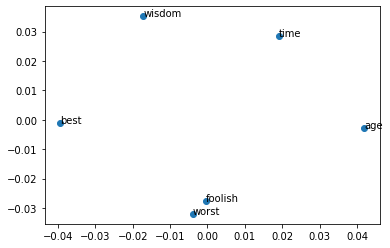

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model.wv.__getitem__(model.wv.index_to_key)
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [60]:
model.wv.similarity('best', 'worst')

0.13887982

In [61]:
model.wv.most_similar('foolish')

[('worst', 0.17018885910511017),
 ('best', 0.06408978998661041),
 ('wisdom', -0.013514922931790352),
 ('time', -0.023671654984354973),
 ('age', -0.05234673619270325)]

In [62]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]"
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]"
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]"
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]"


# Sentence Embedding (Document Vectors)

In [63]:
# Remove out-of-vocabulary words

sentence = ['best', 'bansal', 'time', 'kanav']

vocab_tokens = [word for word in sentence if word in model.wv.index_to_key]

vocab_tokens

['best', 'time']

In [64]:
# Create document vectors by averaging word vectors

np.mean(model.wv.__getitem__(vocab_tokens), axis=0)

array([-8.6735850e-03,  2.8979499e-03,  2.1581696e-03, -1.7885750e-03,
       -9.8061212e-04, -3.7891967e-03,  2.7690111e-03,  4.8756767e-03,
       -4.6693720e-03, -6.5232953e-03, -2.7048176e-03, -5.3278962e-03,
       -6.4251497e-03, -1.2493895e-03,  3.0445517e-04, -5.6858570e-04,
        3.8068579e-04,  9.2990650e-04, -3.0666459e-03, -1.1344015e-03,
       -3.3043111e-03, -2.6271159e-03,  8.2706194e-03, -1.0838672e-03,
       -2.2073742e-04, -3.7620717e-04, -9.0713974e-04, -2.5862674e-03,
       -1.3156777e-04,  6.6179251e-03,  7.8556351e-03, -6.5627526e-03,
       -2.5582409e-03, -6.9178990e-03,  1.9483893e-03,  6.0251304e-03,
        6.4321910e-03,  5.5842018e-03,  7.2997799e-03,  3.0152500e-03,
        8.7251253e-03, -7.1729645e-03, -8.2131261e-03, -1.3105709e-03,
       -1.9392008e-03,  2.3391065e-03,  2.6729943e-03,  2.9715800e-03,
        4.0672242e-04,  8.2550046e-05,  5.2809850e-03, -8.9346431e-03,
        3.8251362e-03,  6.0026506e-03, -5.2615297e-03,  5.4140193e-03,
      

In [65]:
np.mean(model.wv.__getitem__(vocab_tokens), axis=0).shape

(100,)

In [66]:
def document_vector(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [67]:
df['doc_vector_w2v'] = df.tokenised_sentences.apply(lambda x : document_vector(x, model.wv))

df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector_w2v
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]","[-0.008673585, 0.00289795, 0.0021581696, -0.00..."
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0...."
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]","[-0.0043894527, 0.004767893, 0.0024528443, 0.0..."
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]","[-0.00022083164, 0.0016568756, -0.0008546477, ..."


# Pretrained GloVe Embeddings

In [68]:
import gensim
import gensim.downloader as api

print(gensim.__version__)

print(list(gensim.downloader.info()['models'].keys()))

4.2.0
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [69]:
wv = api.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [70]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [71]:
# Vocabulary Size and Word Embedding Shape

print(len(wv.index_to_key))

print(wv.__getitem__("school").shape)

1193514
(50,)


In [72]:
wv.most_similar("developer", topn=5)

[('sharepoint', 0.8866323828697205),
 ('administrator', 0.8673086166381836),
 ('programmer', 0.8619340658187866),
 ('architect', 0.8591458201408386),
 ('oracle', 0.8557209372520447)]

In [73]:
wv.similarity("developer", "development")

0.7817412

In [74]:
wv.__getitem__('college')

array([ 1.7885  , -0.067292,  0.46616 , -0.81783 ,  0.10752 ,  0.30621 ,
        1.4632  , -0.12453 , -0.10154 , -0.23087 , -0.572   ,  0.086826,
       -4.051   ,  0.85883 ,  0.71311 , -0.049015, -0.51012 ,  0.22284 ,
       -0.98466 ,  0.78809 ,  0.53688 ,  0.17593 ,  0.26659 , -0.86271 ,
        0.051508,  0.29894 ,  0.74473 , -0.85046 , -0.32939 , -0.31356 ,
        0.63817 , -1.1198  , -0.1482  , -0.46216 ,  0.046157, -0.46282 ,
       -0.32383 ,  1.5272  ,  0.76098 , -0.1311  , -0.35028 ,  0.51516 ,
       -0.07257 ,  0.2536  ,  0.5363  , -0.46969 ,  0.3285  ,  0.17779 ,
       -0.47109 ,  0.37841 ], dtype=float32)

# Semantic regularities captured in word embeddings

In [75]:
wv.similarity("college", "school")

0.8894184

In [76]:
wv.similarity("college", "university")

0.81164277

In [77]:
wv.similarity("college", "apple")

0.39391714

In [78]:
wv.most_similar("college", topn=5)

[('school', 0.8894184231758118),
 ('student', 0.8599385023117065),
 ('class', 0.8441339731216431),
 ('classes', 0.8319132924079895),
 ('basketball', 0.8274194002151489)]

In [79]:
wv.most_similar("mango", topn=5)

[('yogurt', 0.8689919710159302),
 ('coconut', 0.8518491387367249),
 ('strawberry', 0.8414680361747742),
 ('fanta', 0.8399896621704102),
 ('mocha', 0.8393071293830872)]

In [80]:
wv.most_similar(positive=['college', 'university'], topn=5)

[('student', 0.8731303811073303),
 ('students', 0.8377566337585449),
 ('schools', 0.8342148065567017),
 ('campus', 0.8218968510627747),
 ('cambridge', 0.8131343126296997)]

In [81]:
wv.most_similar(positive=['student', 'class'], negative=['college'], topn=3)

[('teacher', 0.8359395265579224),
 ('form', 0.8157237768173218),
 ('study', 0.8039187788963318)]

In [82]:
print(wv.doesnt_match(['college', 'university', 'school', 'student', 'apple']))

apple


In [83]:
words = ['college', 'mango', 'school','student','class', 'strawberry', 'coconut']

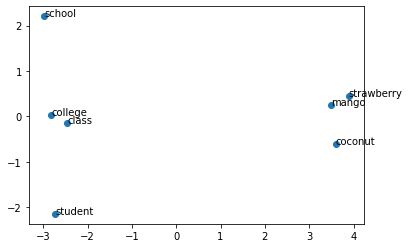

In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = np.array([wv[word] for word in words])
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# Sentence Embedding from Pretrained Model (Document Vectors)

In [85]:
def document_vector_pretrained(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [86]:
df['doc_vector_pretrained_glove'] = df.tokenised_sentences.apply(lambda x : document_vector_pretrained(x, wv))

df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector_w2v,doc_vector_pretrained_glove
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]","[-0.008673585, 0.00289795, 0.0021581696, -0.00...","[0.432825, 0.1588, 0.39231, -0.493835, 0.00431..."
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]","[-0.007879351, 0.0024533845, -0.0009934164, 0....","[0.73222, 0.23221499, 0.29085773, -0.31792, -0..."
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]","[-0.0043894527, 0.004767893, 0.0024528443, 0.0...","[-0.045359, -0.66945, -0.33981, 0.167995, 0.70..."
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]","[-0.00022083164, 0.0016568756, -0.0008546477, ...","[0.027362999, -0.08074499, -0.37674, 0.773955,..."


# Word2Vec vs BERT

# Embeddings

Word2Vec offers pre-trained word embeddings that anyone can use off-the-shelf. The embeddings are key: value pairs, essentially 1-1 mappings between words and their respective vectors. Word2Vec takes a single word as input and outputs a single vector representation of that word.

Since BERT generates contextual embeddings, it takes as input a sequence (usually a sentence) rather than a single word. BERT needs to be shown the context that surrounding words provide before it can generate a word embedding. With BERT, you do need to have the actual model as the vector representations of words will vary based on the specific sequences you’re inputting. The output is a fixed-length vector representation of the input sentence.

BERT or Bidirectional Encoder Representations from Transformers, is a technique that allows for bidirectional training of Transformers for natural language modeling tasks. Language models which are bidirectionally trained can learn deeper context from language than single-direction models. BERT generates context aware embeddings that allow for multiple representations (each representation, in this case, is a vector) of each word based on a given word’s context.

# Word Ordering

Word2Vec embeddings do not take into account the word position.

BERT model explicitly takes as input the position (index) of each word in the sentence before calculating its embedding.

# Out-of-Vocabulary

Since Word2Vec learns embeddings at word level, it can only generate embeddings for words that existed in it’s training set (aka it’s “vocabulary space”). This is a major drawback to Word2Vec - that it just doesn’t support Out-of-Vocabulary words.

Alternatively, BERT learns representations at the subword level, so a BERT model will have a smaller vocabulary space than the number of unique words in its training corpus. In turn, BERT is able to generate embeddings for words outside of its vocabulary space giving it a near infinite vocabulary.

# Sentence BERT (SBERT)

Sentence-BERT (SBERT), a modification of the pretrained BERT network that use siamese and triplet network structures to derive semantically meaningful sentence embeddings that can be compared using cosine-similarity. This reduces the effort for finding the most similar pair from 65 hours with BERT / RoBERTa to about 5 seconds with SBERT, while maintaining the accuracy from BERT.

Usage

1.Computing Sentence Embeddings

2.Semantic Textual Similarity

3.Semantic Search

4.Retrieve and Re-Rank

5.Clustering

6.Paraphrase Mining

7.Translated Sentence Mining

8.Cross Encoders

9.Image Search

In [87]:
pip install -U sentence-transformers

     -------------------------------------- 86.0/86.0 kB 605.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 4.9/4.9 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 162.2/162.2 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 120.7/120.7 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 2.4 MB/s eta 0:00:00
Using legacy 'setup.py install' for sentence-transformers, since package 'wheel' is not installed.
  Running setup.py install for sentence-transformers: started
  Running setup.py install for sentence-transformers: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [88]:
from sentence_transformers import SentenceTransformer, util

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [89]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\SNEGHAL\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:133: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  t = torch.tensor([], dtype=storage.dtype, device=storage._untyped().device)
